In [3]:
import pandas as pd                          
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor                               # import all necessary librarys

In [4]:
data=pd.read_csv('Downloads/coffee_shop_revenue.csv')  # import raw data
data.head(5)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [5]:
data.head(10)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
5,121,8.88,6,9,183.49,484,1155.18
6,238,9.00,11,4,331.35,156,2179.13
7,70,7.81,10,3,273.27,237,890.17
8,152,8.78,14,2,341.79,825,1704.94
9,171,7.73,7,5,344.51,135,2025.55


In [6]:
data.shape

(2000, 7)

In [7]:
data.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [9]:
data.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [10]:
data.duplicated().sum()


0

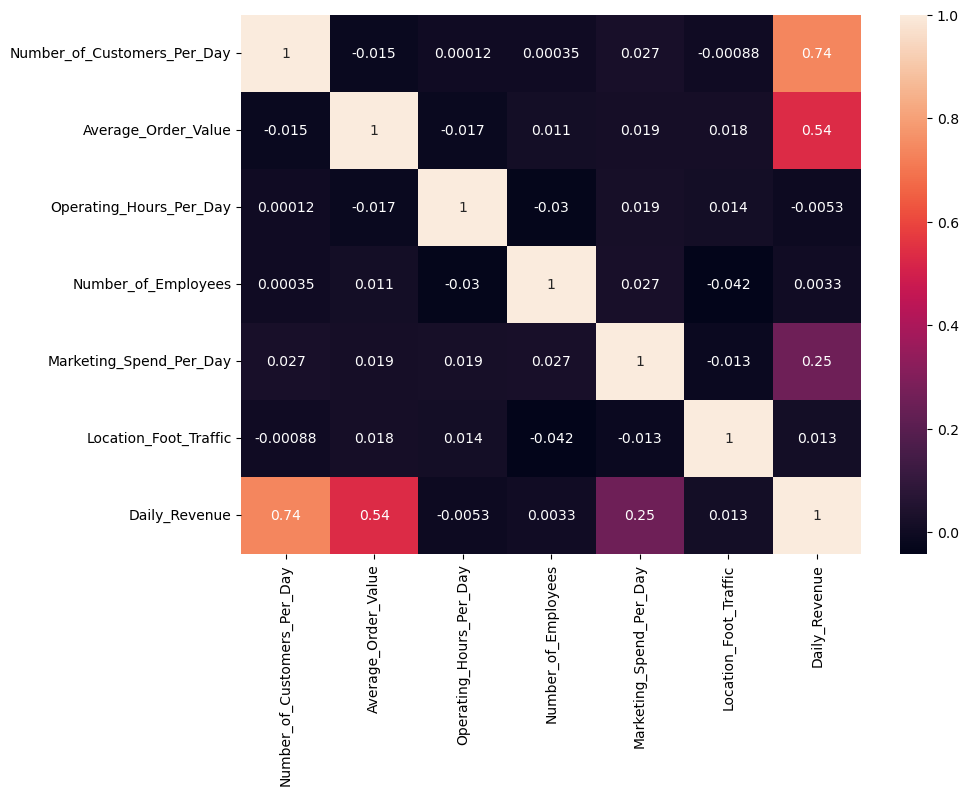

In [11]:
plt.figure(figsize=(10,7))   # checking corelation 
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
data[['Daily_Revenue']]

,Daily_Revenue
0,1547.81
1,2084.68
2,3118.39
3,2912.20
4,1663.42
...,...
1995,2816.85
1996,337.97
1997,951.34
1998,4266.21


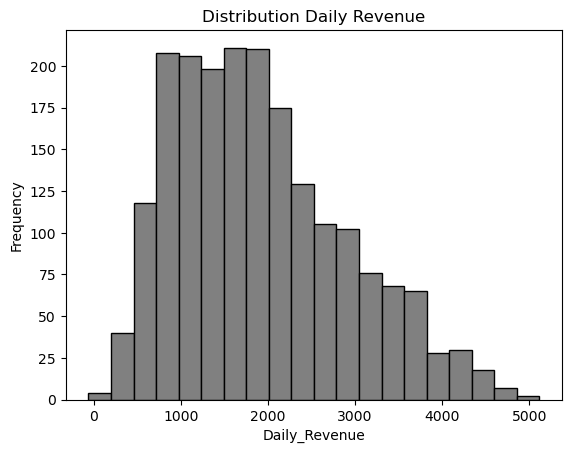

In [13]:
plt.hist(data['Daily_Revenue'], bins=20, color='gray', edgecolor='black')    # visualizing the distribution of daily revenue
plt.title('Distribution Daily Revenue')
plt.xlabel('Daily_Revenue')
plt.ylabel('Frequency')
plt.show()          

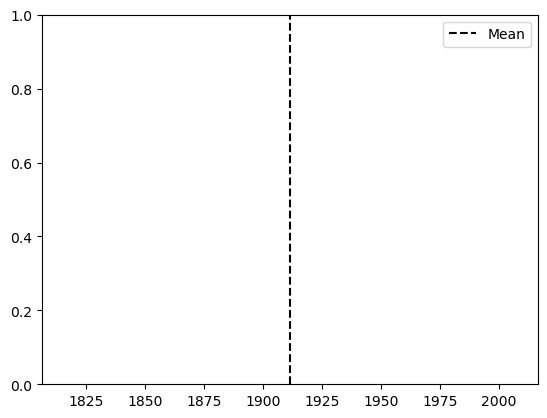

In [111]:
plt.axvline(data['Daily_Revenue'].mean(), color='black', linestyle='dashed', label='Mean')   # # visualizing the mean value
plt.legend()

In [14]:
data.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a694973a70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6948f8bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a693fd29f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6949d7f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a69400c170>],
 'means': []}

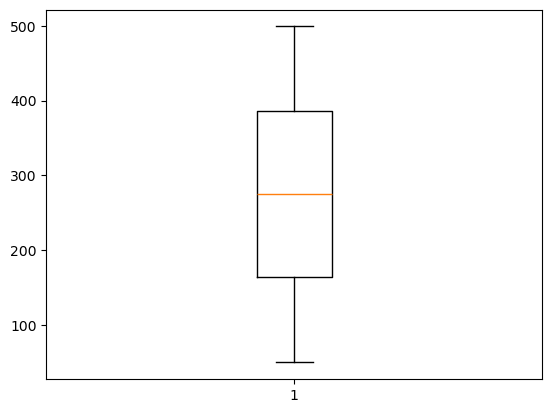

In [15]:
plt.boxplot(data['Number_of_Customers_Per_Day'])  # checking out layers 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a69499f6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a694059250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a694058dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a694059820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a694059b20>],
 'means': []}

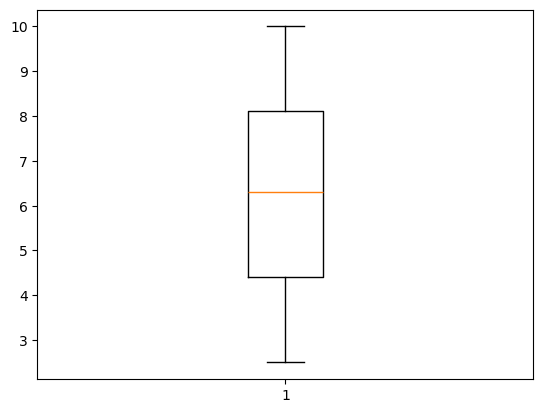

In [16]:
plt.boxplot(data['Average_Order_Value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6940c8920>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6940c8e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a69407f530>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6940c9340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6940c95e0>],
 'means': []}

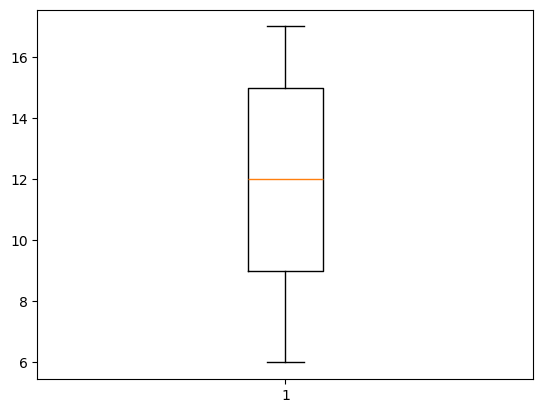

In [17]:
plt.boxplot(data['Operating_Hours_Per_Day'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a694d22cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a694d231d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a694d22a20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a694d23770>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a694d239e0>],
 'means': []}

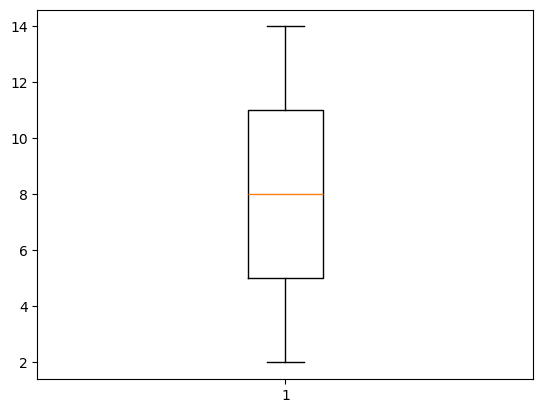

In [18]:
plt.boxplot(data['Number_of_Employees'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a694d8c4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a694d8dfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a694d8d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a694d8e540>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a694d8e810>],
 'means': []}

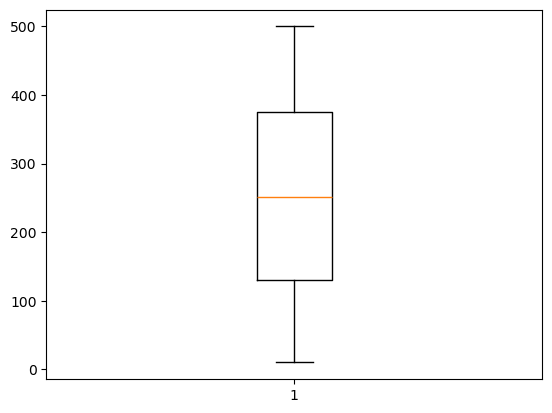

In [19]:
plt.boxplot(data['Marketing_Spend_Per_Day'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a694ddfbc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6941041a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a694ddfa40>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6941046e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a694104980>],
 'means': []}

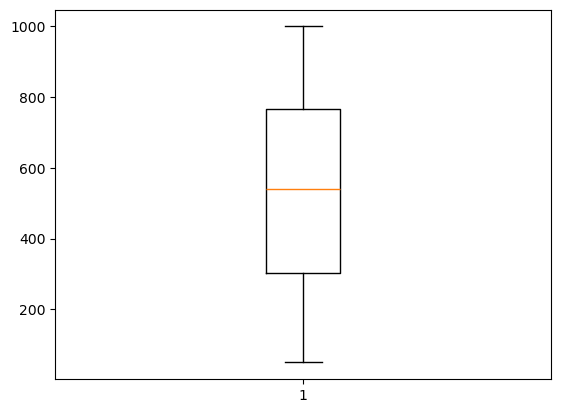

In [20]:
plt.boxplot(data['Location_Foot_Traffic'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a694127da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a694155550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a694154f80>],
 'medians': [<matplotlib.lines.Line2D at 0x1a694155ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a694155dc0>],
 'means': []}

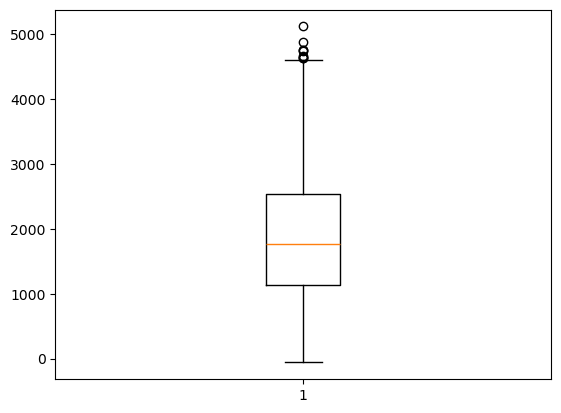

In [21]:
plt.boxplot(data['Daily_Revenue'])

In [22]:
ul=data['Daily_Revenue'].mean()+2.9*data['Daily_Revenue'].std()
ul

4748.313903579111

In [23]:
ll=data['Daily_Revenue'].mean()-3*data['Daily_Revenue'].std()

In [24]:
new_data=data.loc[(data['Daily_Revenue']<ul)& (data['Daily_Revenue']>ll)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1a69419f890>,
 'caps': [<matplotlib.lines.Line2D at 0x1a69419fd70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a69419f5f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6941d0260>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6941d04d0>],
 'means': []}

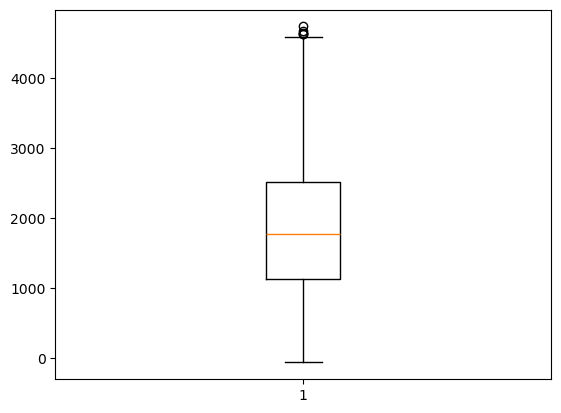

In [25]:
plt.boxplot(new_data['Daily_Revenue'])

In [26]:
data=new_data

In [27]:
x=data.iloc[:,:-1]   # splitting into training columns
x.head(2) 

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
0,152,6.74,14,4,106.62,97
1,485,4.50,12,8,57.83,744


In [29]:
y=data.iloc[:,-1:]    # splitting into target column
y.head(2)

,Daily_Revenue
0,1547.81
1,2084.68


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
reg=LinearRegression()  # using LinearRegression

In [32]:
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=reg.predict(x_test)

In [34]:
acc=r2_score(y_pred,y_test)

In [35]:
print(acc*100)

87.12619398967438


In [36]:
ran= RandomForestRegressor(random_state=42)  # using RandomForest

In [37]:
ran.fit(x_train,y_train)

C:\Users\Madhan\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [38]:
y_pred=ran.predict(x_test)

In [39]:
acc=r2_score(y_pred,y_test)

In [40]:
print(acc*100)

94.265473580322


In [41]:
o=ran.predict(x_train)

In [42]:
acc=r2_score(o,y_train)

In [43]:
print(acc*100)

99.15862173974799


In [44]:
model=RandomForestRegressor(random_state=42,max_depth=10,min_samples_split=2)

In [45]:
bagged_model = BaggingRegressor(
    model,
    n_estimators=100, 
    random_state=42)   # using bagging technique for reduce overfitting's 

In [46]:
bagged_model.fit(x_train, y_train)

C:\Users\Madhan\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=RandomForestRegressor(max_depth=10, random_state=42),
                 n_estimators=100, random_state=42)

In [47]:
y_prd=bagged_model.predict(x_test)

In [48]:
r2_score(y_prd,y_test)*100

94.24505512091545

In [49]:
z=bagged_model.predict(x_train)

In [50]:
r2_score(z,y_train)*100

97.73558612844562

In [51]:
import pickle
with open("Daily Revenue.pkl", "wb") as file:
    pickle.dump(ran, file)

print("✅ Model trained and saved successfully!")

✅ Model trained and saved successfully!
